In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import re
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/ekdom_final_merge_diabetics.csv")

In [ ]:
df.head()

,No. of Pregnancy,Age,BMI,BloodPressure,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,3.0,50.0,22.26,90.0,0.0,317.50,14.6,1.0
1,1.0,40.0,24.11,80.0,0.0,317.50,6.1,0.0
2,0.0,21.0,17.18,80.0,0.0,259.08,9.7,1.0
3,2.0,30.0,21.24,85.0,0.0,322.58,17.8,1.0
4,2.0,35.0,22.82,75.0,0.0,335.28,16.7,1.0


In [ ]:
df.isnull()

,No. of Pregnancy,Age,BMI,BloodPressure,Insulin,Skin Thickness(mm),Glucose Consumption,Outcome
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
992,False,False,False,False,False,False,False,False
993,False,False,False,False,False,False,False,False
994,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

No. of Pregnancy       0
Age                    0
BMI                    0
BloodPressure          0
Insulin                0
Skin Thickness(mm)     0
Glucose Consumption    0
Outcome                0
dtype: int64

In [ ]:
# df.to_csv('/content/drive/MyDrive/ML_Paper/ekdom_final_merge_diabetics.csv', index=False)

In [ ]:
X=df.drop(['Outcome'],axis = 1)


In [ ]:
y = df.iloc[:,7]
y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
992    1.0
993    0.0
994    0.0
995    0.0
996    0.0
Name: Outcome, Length: 997, dtype: float64

In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn xgboost lightgbm

In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model_names = []
acc = []
pre = []
rec = []
f1_matrix = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

# XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)

# LightGBM
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)
y_pred_lgb = lgb_classifier.predict(X_test)

# Evaluate the models
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'LightGBM']
predictions = [y_pred_logreg, y_pred_rf, y_pred_xgb, y_pred_gb, y_pred_lgb]

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    accuracy = "{:.2f}".format(accuracy)
    precision = "{:.2f}".format(precision)
    recall = "{:.2f}".format(recall)
    f1 = "{:.2f}".format(f1)


    model_names.append(model)
    acc.append(accuracy)
    pre.append(precision)
    f1_matrix.append(f1)


    # print(f"--- {model} ---")
    # print(f"Accuracy: {accuracy:.2f}")
    # print(f"Precision: {precision:.2f}")
    # print(f"Recall: {recall:.2f}")
    # print(f"F1 Score: {f1:.2f}")
    # print("---------------------")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 428, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 797, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537014 -> initscore=0.148327
[LightGBM] [Info] Start training from score 0.148327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
results_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": acc,
    "Precision": pre,
    "F1_score": f1_matrix
})
from tabulate import tabulate
# Print the results table
print(tabulate(results_df, headers='keys', tablefmt='psql'))

+----+---------------------+------------+-------------+------------+
|    | Model               |   Accuracy |   Precision |   F1_score |
|----+---------------------+------------+-------------+------------|
|  0 | Logistic Regression |       0.84 |        0.9  |       0.86 |
|  1 | Random Forest       |       0.86 |        0.95 |       0.88 |
|  2 | XGBoost             |       0.85 |        0.93 |       0.87 |
|  3 | Gradient Boosting   |       0.88 |        0.95 |       0.89 |
|  4 | LightGBM            |       0.86 |        0.93 |       0.88 |
+----+---------------------+------------+-------------+------------+


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 428, number of negative: 369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 797, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.537014 -> initscore=0.148327
[LightGBM] [Info] Start training from score 0.148327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

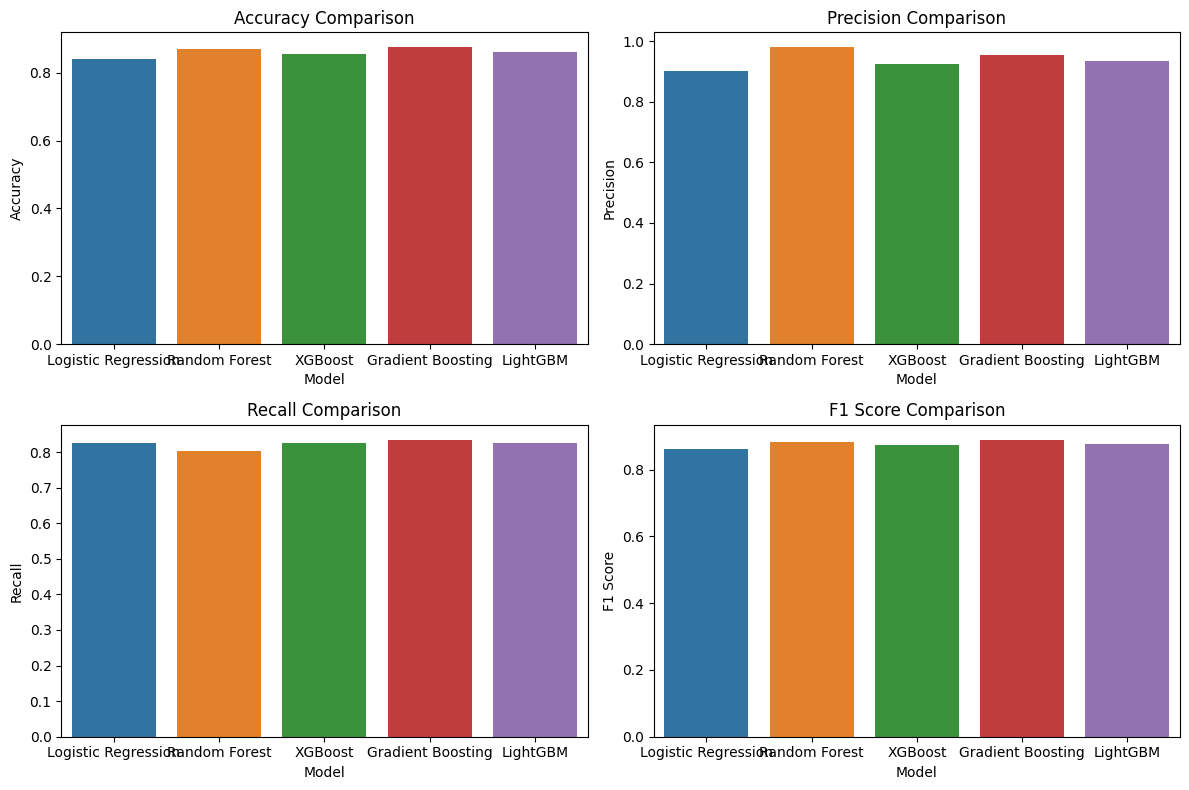

In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn xgboost lightgbm matplotlib seaborn

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', xgb.XGBClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('LightGBM', lgb.LGBMClassifier())
]

# Initialize empty dictionaries to store metrics
accuracy_dict = {}
precision_dict = {}
recall_dict = {}
f1_dict = {}

# Train and evaluate models
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy_dict[model_name] = accuracy_score(y_test, y_pred)
    precision_dict[model_name] = precision_score(y_test, y_pred)
    recall_dict[model_name] = recall_score(y_test, y_pred)
    f1_dict[model_name] = f1_score(y_test, y_pred)

# Create dataframes from dictionaries
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy'])
precision_df = pd.DataFrame(list(precision_dict.items()), columns=['Model', 'Precision'])
recall_df = pd.DataFrame(list(recall_dict.items()), columns=['Model', 'Recall'])
f1_df = pd.DataFrame(list(f1_dict.items()), columns=['Model', 'F1 Score'])

# Plotting
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=accuracy_df)
plt.title('Accuracy Comparison')

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision', data=precision_df)
plt.title('Precision Comparison')

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall', data=recall_df)
plt.title('Recall Comparison')

# F1 Score plot
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1 Score', data=f1_df)
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()


In [ ]:
feature1 = float(input("Enter the value for the feature 'No. of Pregnancy': "))
feature2 = float(input("Enter the value for the feature 'Age': "))
feature3 = float(input("Enter the value for the feature 'BMI': "))
feature4 = float(input("Enter the value for the feature 'BloodPressure': "))
feature5 = float(input("Enter the value for the feature 'Insulin': "))
feature6 = float(input("Enter the value for the feature 'Skin Thickness(mm)': "))
feature7 = float(input("Enter the value for the feature 'Glucose Consumption': "))

input_features = [[feature1, feature2, feature3, feature4, feature5, feature6, feature7]]

logreg_prediction = logreg.predict(input_features)
rf_prediction = rf_classifier.predict(input_features)
xgb_prediction = xgb_classifier.predict(input_features)
gb_prediction = gb_classifier.predict(input_features)
lgb_prediction = lgb_classifier.predict(input_features)

print("Logistic Regression Prediction:", logreg_prediction[0])
print("Random Forest Prediction:", rf_prediction[0])
print("XGBoost Prediction:", xgb_prediction[0])
print("Gradient Boosting Prediction:", gb_prediction[0])
print("LightGBM Prediction:", lgb_prediction[0])


Enter the value for the feature 'No. of Pregnancy': 2
Enter the value for the feature 'Age': 27
Enter the value for the feature 'BMI': 22
Enter the value for the feature 'BloodPressure': 80
Enter the value for the feature 'Insulin': 0
Enter the value for the feature 'Skin Thickness(mm)': 250
Enter the value for the feature 'Glucose Consumption': 18
Logistic Regression Prediction: 0.0
Random Forest Prediction: 1.0
XGBoost Prediction: 1
Gradient Boosting Prediction: 1.0
LightGBM Prediction: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
